# Team 4 Analysis

By Melita, Dani and Rose

### Contents

**0. [Imports and functions](#0.-Imports-and-functions)**

**1. [Preprocessing the data](#1.-Preprocessing-the-data)**

1.1 [Understanding the data](#1.1-Understanding-the-data)

1.2 [Checking for missing data](#1.2-Checking-for-missing-data)

1.3 [Dealing with outliers](#1.3-Dealing-with-outliers)

1.4 [Encoding categorical data](#1.4-Encoding-categorical-data)

1.5 [Feature scaling](#1.5-Feature-scaling)

1.6 [Splitting into train and test data](#1.6-Splitting-into-train-and-test-data)

1.7 [Determining the threshold](#1.7-Determining-the-threshold)
        
**2. [Logistic Regression model](#2.-Logistic-Regression-model)**

2.1 [Default model](#2.1-Default-model)

2.2 [Tuning the hyperparameters](#2.2-Tuning-the-hyperparameters)

2.3 [Tuned model](#2.3-Tuned-model)

2.4 [Evaluating the tuned model](#2.4-Evaluating-the-tuned-model)
    
2.5 [Comparing the default model to the tuned model](#2.5-Comparing-the-default-model-to-the-tuned-model)
    
**3. [Decision Tree model](#3.-Decision-Tree-model)**

3.1 [Tuning the hyperparameters](#3.1-Tuning-the-hyperparameters)

3.2 [Running the model](#3.2-Running-the-model)

3.3 [Evalutating the model](#3.3-Evalutating-the-model)
    
**4. [Random Forest model](#4.-Random-Forest-model)**

4.1 [Tuning the hyperparameters](4.1-Tuning-the-hyperparameters)

4.2 [Running the model](#4.2-Running-the-model)

4.3 [Evaluating the model](#4.3-Evaluating-the-model)

**5. [Nueral network](#5.-Neural-network)**

5.1 [Tuning the hyperparameters](5.1-Tuning-the-hyperparameters)

5.2 [Evaluating the model](#5.2-Evaluating-the-model)

**6. [Conclusion](#6.-Conclusion)**

6.1 [Comparing the models side-by-side](#6.1-Comparing-the-models-side-by-side)

6.2 [Recommendations for future work](#6.2-Recommendations-for-future-work)

## 0. Imports and functions

In [1]:
import utilities
import constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from itertools import product
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import (auc, confusion_matrix, roc_curve, 
                             accuracy_score, precision_score)
import warnings
warnings.filterwarnings('ignore')

## 1. Preprocessing the data

### 1.1 Understanding the data

In [2]:
# Load data
df_raw = pd.read_csv("data.csv", index_col=[0])
df_raw.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

Columns 8, 18 and 28 have spaces in their names, so for consistency and ease, we shall replace the spaces with underscores.

In [4]:
# Change spaces in names to underscores
df_raw=df_raw.rename(columns={"concave points_mean":"concave_points_mean",
                            "concave points_se":"concave_points_se",
                            "concave points_worst":"concave_points_worst"})

There are actually ten features of the breast masses measured:
- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Concave points
- Symmetry
- Fractal dimension

These features then have three measurements:
- Mean
- Standard error
- Worst (maximum)

Each feature and its three measurements combine to give us thirty features in our dataset.

We can look at the distribution of features comparing benign and malignant masses to get an idea of how the two groups may differ. 

Here are three examples:
- radius mean
- area mean
- symmetry mean

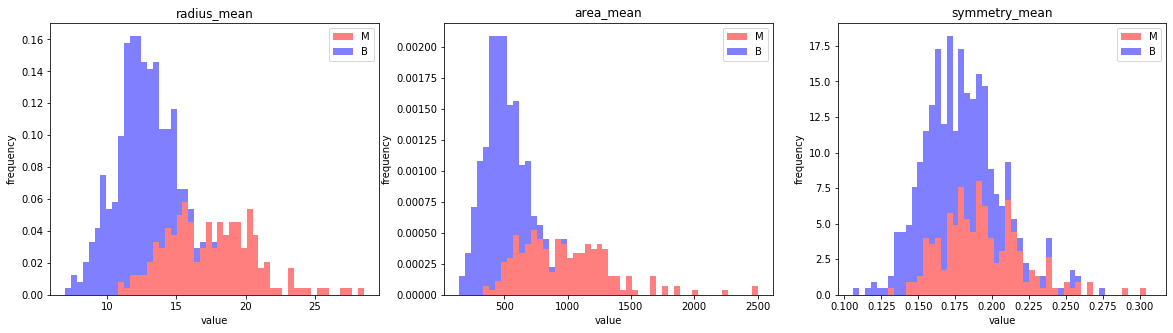

In [5]:
# Identify features for histograms
hist_data = df_raw[['radius_mean','area_mean','symmetry_mean','diagnosis']]

# Split the dataset into benign and malignant

benign_df = hist_data[hist_data['diagnosis'] =='B']
malignant_df = hist_data[hist_data['diagnosis'] =='M']

#print(hist_data.iloc[:,0])

# Plotting three histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for idx,ax in enumerate(axes):
    #print(idx)
    ax.figure
    binwidth= (max(hist_data.iloc[:,idx]) - min(hist_data.iloc[:,idx]))/50
    #print([malignant_df.iloc[idx], benign_df.iloc[idx]])
    ax.hist([malignant_df.iloc[:,idx], benign_df.iloc[:,idx]], 
            bins = np.arange(min(hist_data.iloc[:,idx]), max(hist_data.iloc[:,idx]) + binwidth, binwidth), 
            alpha=0.5,
            stacked=True, 
            density = True,
            label=['M','B'],
            color=["red","blue"])
    ax.legend(loc='upper right')
    ax.set_title(hist_data.iloc[:,idx].name)
    ax.set_ylabel("frequency")
    ax.set_xlabel("value")
plt.show()

### 1.2 Check for missing data

Examining the data, we can see that there is an empty column called 'Unnamed: 32' which we can drop.

In [6]:
# Drop empty column
df_raw=df_raw.drop('Unnamed: 32', axis=1)

Taking a closer look at the columns in the table above, we can see that all the features are floats and the labels are objects.

In [7]:
df_raw['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

And here we can see that there are just two labels, B for benign and M for malignant.

In [8]:
df_raw.isnull().values.any()

False

This tells us that there are no NaN or null values in our dataset.

In [9]:
df_described = df_raw.describe()
df_described

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
min_values = df_described.loc['min', : ]
min_values

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave_points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.049960
radius_se                    0.111500
texture_se                   0.360200
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.001713
compactness_se               0.002252
concavity_se                 0.000000
concave_points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst            0.027290
concavity_wo

Looking at the minimum values in our dataset, only six features have minimums of zero and they all refer to concavity. Zero concavity means that the breast mass is close to circular, hence a zero value is meaningful and we can keep them in our dataset.

### 1.3 Dealing with outliers

We considered categorising outliers as points more than 1.5 times the interquartile range from the upper or lower quartile.

The boxplot demonstrates this graphically for the example of radius mean:

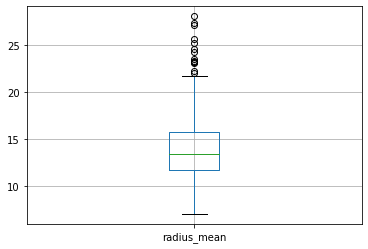

In [11]:
df_raw.boxplot(column="radius_mean")

The length of the whisker is either the 1.5 times the length of the box (as in the case of the upper whisker) or if there are no points at that distance, the distance to the most extreme point (as in the case of the lower whisker).

Therefore, all the points drawn as circles would be classified as outliers.

However, it was stated in the original paper for this dataset:

> "All of the features are numerically modeled such that larger values will typically indicate a higher likelihood of malignancy"

Considering this, we have decided not to remove any outliers, as they are likely to represent extreme cases of malignant or benign breast masses.

### 1.4 Encoding categorical data

The "diagnosis" column is made up of objects, M or B. We need to encode this categorical data so that there is a single column which represents B as 0 and M as 1.

In [12]:
one_hot_df = pd.get_dummies(df_raw, drop_first=True)
one_hot_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


The new column is called "diagnosis_M"

### 1.5 Feature scaling

We want to scale the features so that their mean is zero and their standard deviation is one. This can prevent models from over-weighting larger values and ignoring smaller ones, and can also help some models run faster.

In [13]:
# Set target and features
target = one_hot_df['diagnosis_M']
one_hot_df_indep = one_hot_df.drop('diagnosis_M', axis=1)

# Scale the features to have mean 0 and sd 1
std_features = (one_hot_df_indep.apply(lambda x : (x - np.mean(x)) / np.std(x)))
std_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 1.6 Splitting into train and test data

The final preprocessing step is to divide the dataset into train and test data. We have chosen to keep 20% of the data for testing.

In [14]:
# Split into train and test data
X = one_hot_df_indep.values
X_train, X_test, y_train, y_test  = train_test_split(X, target,
                                                     test_size = 0.2,
                                                    random_state=constants.SEED)


Now we can check the numbers of benign and malignant datapoints in each group

In [15]:
train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))

% positive in train set (count/total): 37.14% (169/455)
% positive in test set (count/total): 37.72% (43/114)


### 1.7 Determining the threshold

There are a number of very important factors to consider when determining the threshold at which we diagnose a breast mass as malignant.

Firstly, a false negative means that we do not diagnose a tumor as malignant when it is, potentially risking the patients life as a result. However, it is highly unlikely that any time in the near future these algorithms alone will be diagnosing patients. Much more likely is that there will be a doctor working alongside, or with the aid of, a model and so this risk becomes less severe.

Secondly, a false positive means that we diagnose a benign tumor as malignant, and the patient is subjected to an unnecessary surgical biopsy, which has its own risks. 

Considering these factors, we have decided to set the threshold at 30%, i.e. any case which has a probability of being malignant over 0.3 will be classified as malignant.

## 2. Logistic Regression model

### 2.1 Default model

In this first section, we will use the default hyperparameters from sklearn to see how our model does with no adjustments.

We will use this later to demonstrate how the predictive power of the logistic regression model improved after hyperparameter tuning.

Here, we run the model and print its accuracy, precision and AUC. These are all measures of the model's effectiveness, and the closer they are to 1 (or 100%), the better.

In [16]:
# Default model
logistic_regression_default = LogisticRegression(random_state=constants.SEED)

# Fit the model to the test data
logistic_regression_default.fit(X_train,y_train)

# Get the model's probabilities
proba_logistic_regression_default = logistic_regression_default.predict_proba(X_test)

# Calculate the model's predictions from the probablities and the threshold of 0.3
pred_logistic_regression_default = np.where(proba_logistic_regression_default[:,1] > constants.THRESHOLD, 1, 0)

# Print the metrics
utilities.print_metrics(X_test,
                        y_test,
                        pred_logistic_regression_default, 
                        proba_logistic_regression_default,
                        "Default Logistic Regression",
                        return_values = False)

Default Logistic Regression accuracy: 97.40%
Default Logistic Regression precision: 95.00%
Default Logistic Regression AUC: 0.9971


### 2.2 Tuning the hyperparameters

Now we will search through a range of hyperparameters, to improve our model's predictive power.

The hyperparameters we search over are:
- The penalty (penalty) - Used to specify the norm used in the penalization
- The inverse of regularization strength (C)

In [19]:
# Grid Search

# Set the hyperparameters to search over
logistic_regression_grid_values = {'penalty': ['l1', 'l2'],
                                   'C':[0.001,.009,0.01,.09,1,5,10,25, 40, 50]}

# Set the hyperparameters which will be fixed
logistic_regression_search_input = LogisticRegression(random_state=constants.SEED)


logistic_regression_grid_search = GridSearchCV(logistic_regression_search_input,
                                               param_grid = logistic_regression_grid_values,
                                               cv = 5)

logistic_regression_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25, 40, 50],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Now we can see what the best parameters are.

In [20]:
logistic_regression_params = logistic_regression_grid_search.best_params_
logistic_regression_params

{'C': 5, 'penalty': 'l2'}

### 2.3 Tuned model

Now we can take the parameters from our grid search and set up our tuned model

In [21]:
logistic_regression_tuned = LogisticRegression(random_state = constants.SEED,
                                               penalty = logistic_regression_params['penalty'],
                                               C = logistic_regression_params['C'])

logistic_regression_tuned.fit(X_train, y_train)

proba_logistic_regression_tuned = logistic_regression_tuned.predict_proba(X_test)
pred_logistic_regression_tuned = np.where(proba_logistic_regression_tuned[:,1] > constants.THRESHOLD, 1, 0)

### 2.4 Evaluating the tuned model

Let's have a look at the accuracy, precision and AUC for the tuned Logistic Regression model.

In [22]:
logistic_regression_tuned_acc, logistic_regression_tuned_precision, logistic_regression_tuned_auc = utilities.print_metrics(X_test,
                                                        y_test, 
                                                        pred_logistic_regression_tuned, 
                                                        proba_logistic_regression_tuned,
                                                        "Tuned Logistic Regression model")

Tuned Logistic Regression model accuracy: 97.40%
Tuned Logistic Regression model precision: 95.00%
Tuned Logistic Regression model AUC: 0.9974


Now let's look at the confusion matrix. This will show us how the model actually labelled the test data, and we can see how many false positives and false negatives there were.

<class 'numpy.ndarray'>
Confusion matrix, without normalization
[[70  1]
 [ 2 41]]
Normalized confusion matrix
[[0.98591549 0.01408451]
 [0.04651163 0.95348837]]


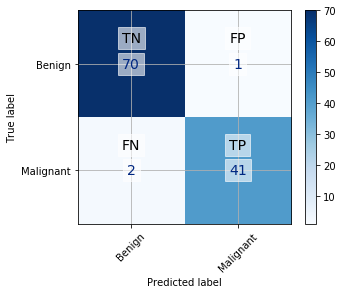

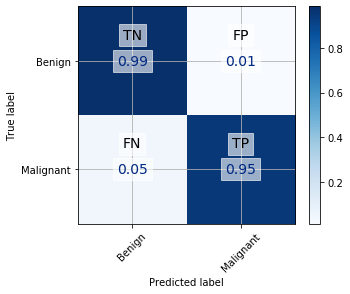

<Figure size 432x288 with 0 Axes>

In [48]:
#Confusion matrix, to see where our classifier is making mistakes:

logistic_regression_tuned_conf = confusion_matrix(y_test,pred_logistic_regression_tuned)

print(type(logistic_regression_tuned_conf))

utilities.plot_conf_matrix(logistic_regression_tuned_conf, normalize=False)
utilities.plot_conf_matrix(logistic_regression_tuned_conf, normalize=True)
plt.show()
plt.tight_layout()

### 2.5 Comparing the default model to the tuned model

First let's compare metrics:

In [25]:
# Print the default metrics
utilities.print_metrics(X_test,
                        y_test, 
                        pred_logistic_regression_default, 
                        proba_logistic_regression_default,
                        "Default Logistic Regression model",
                        return_values = False)

# Print the tuned metrics
utilities.print_metrics(X_test,
                        y_test, 
                        pred_logistic_regression_tuned, 
                        proba_logistic_regression_tuned,
                        "Tuned Logistic Regression model",
                        return_values = False)

Default Logistic Regression model accuracy: 97.40%
Default Logistic Regression model precision: 95.00%
Default Logistic Regression model AUC: 0.9971
Tuned Logistic Regression model accuracy: 97.40%
Tuned Logistic Regression model precision: 95.00%
Tuned Logistic Regression model AUC: 0.9974


It's clear that the tuned model is only very slightly better than the default one. The accuracy and precision have stayed the same, meaning that both models are prediciting the same number of positives and negatives, and getting the same number correct. 

The AUC is the only measure that has changed, and this means that the model's capacity to predict correctly has improved, but due to the threshold we are using, we don't see this in our results.

We can visualise how the models differ by comparing the coefficients magnitudes of the two models. This will show us differences in how the model weighted different features.

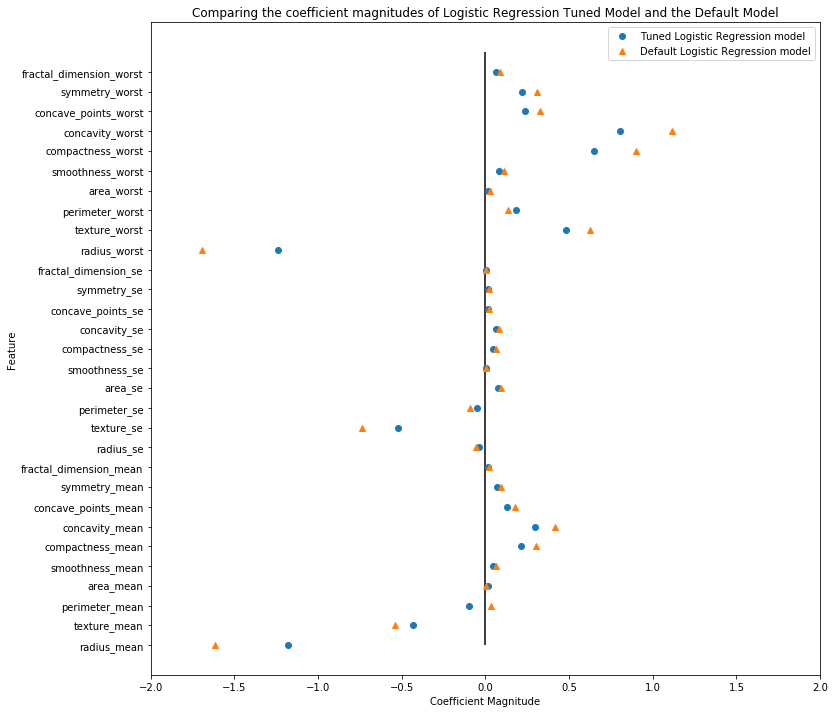

In [26]:
one_hot_df_features = [x for i,x in enumerate(one_hot_df_indep.columns)]
y = np.arange(30)

plt.figure(figsize=(12,12))
plt.plot(logistic_regression_tuned.coef_.T, y, 'o', label="Tuned Logistic Regression model")
plt.plot(logistic_regression_default.coef_.T, y, '^', label="Default Logistic Regression model")
plt.yticks(range(one_hot_df_indep.shape[1]), one_hot_df_features)
plt.vlines(0, 0, one_hot_df_indep.shape[1])
plt.xlim(-2, 2)
plt.title('Comparing the coefficient magnitudes of Logistic Regression Tuned Model and the Default Model')
plt.ylabel("Feature")
plt.xlabel("Coefficient Magnitude")
plt.legend()
plt.show()

## 3. Decision Tree model

### 3.1 Tuning the hyperparameters

We will start by tuning some of the hyperparameters in order to achieve maximum accuracy with this model. This will be done by searching over a range of values for three of the hyperparameters of the Decision Tree:

- The criterion (criterion) - the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- The maximum depth of the tree (max_depth)
- The splitter (splitter) - the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

In [21]:
#Define Decision Tree Classifier 

decision_tree_criterion = ['gini', 'entropy']
decision_tree_splitter = ['best', 'random']
decision_tree_max_depth = [int(x) for x in np.linspace(5, 55, num = 5)]

decision_tree_params = {"criterion": decision_tree_criterion,
               "splitter": decision_tree_splitter,
               "max_depth": decision_tree_max_depth, 
              }


decision_tree_search_input = DecisionTreeClassifier(random_state=constants.SEED)

decision_tree_grid_search = GridSearchCV(decision_tree_search_input, decision_tree_params, cv=5, scoring='precision');


decision_tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

Now we can see what the best parameters are.

In [22]:
decision_tree_params = decision_tree_grid_search.best_params_
decision_tree_params

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

... and use them for our model.

### 3.2 Running the model

In [23]:
decision_tree = DecisionTreeClassifier(random_state = constants.SEED,
                               criterion = decision_tree_params['criterion'],
                               splitter = decision_tree_params['splitter'],
                                max_depth = decision_tree_params['max_depth'])

decision_tree.fit(X_train, y_train)

proba_decision_tree = decision_tree.predict_proba(X_test)
pred_decision_tree = np.where(proba_decision_tree[:,1] > constants.THRESHOLD, 1, 0)

### 3.3 Evalutating the model

First, lets take a look at the accuracy, precision and AUC of the Decision Tree.

In [24]:
decision_tree_acc, decision_tree_precision, decision_tree_auc = utilities.print_metrics(X_test,y_test,pred_decision_tree,proba_decision_tree, "Decision Tree")

Decision Tree accuracy: 94.70%
Decision Tree precision: 88.00%
Decision Tree AUC: 0.9324


The AUC is another measure of how good the model is. The closer it is to one the better the model.

We can also plot the confusion matrix, which gives us a visual representation of how the model labelled the test data.

[[70  1]
 [ 5 38]]
Confusion matrix, without normalization
[[70  1]
 [ 5 38]]
Normalized confusion matrix
[[0.98591549 0.01408451]
 [0.11627907 0.88372093]]


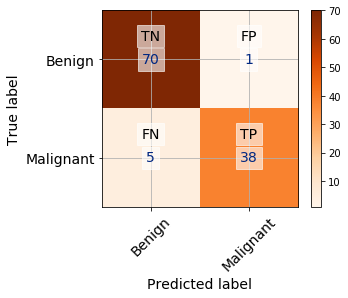

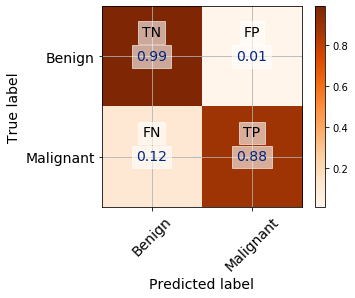

<Figure size 432x288 with 0 Axes>

In [25]:
#Confusion matrix, to see where our classifier is making mistakes:

print(metrics.confusion_matrix(y_test, pred_decision_tree))

decision_tree_conf = confusion_matrix(y_test,pred_decision_tree)
utilities.plot_conf_matrix(decision_tree_conf, normalize=False, cmap='Oranges')
utilities.plot_conf_matrix(decision_tree_conf, normalize=True, cmap='Oranges')
plt.show()
plt.tight_layout()

We can also look at feature importance. This graph will show us which features were most important for the Decision Tree model in determining whether a mass was benign or malignant.

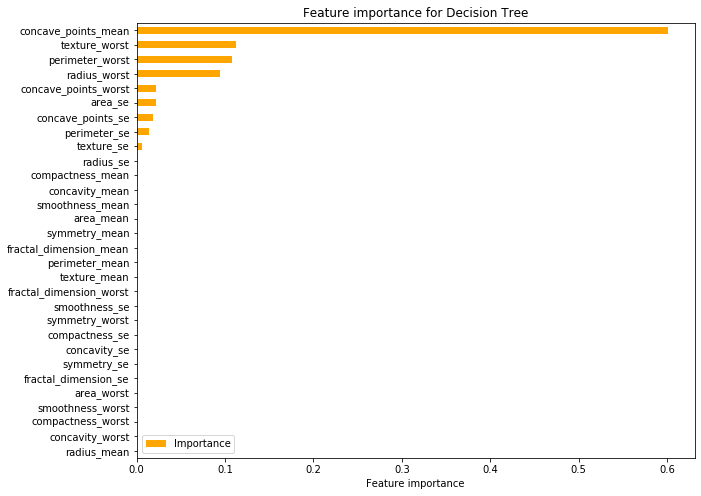

In [26]:
utilities.plot_feature_importance(decision_tree,"orange","Decision Tree", one_hot_df_indep)
plt.show()


Finally, we can plot a visual decision tree plot. A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

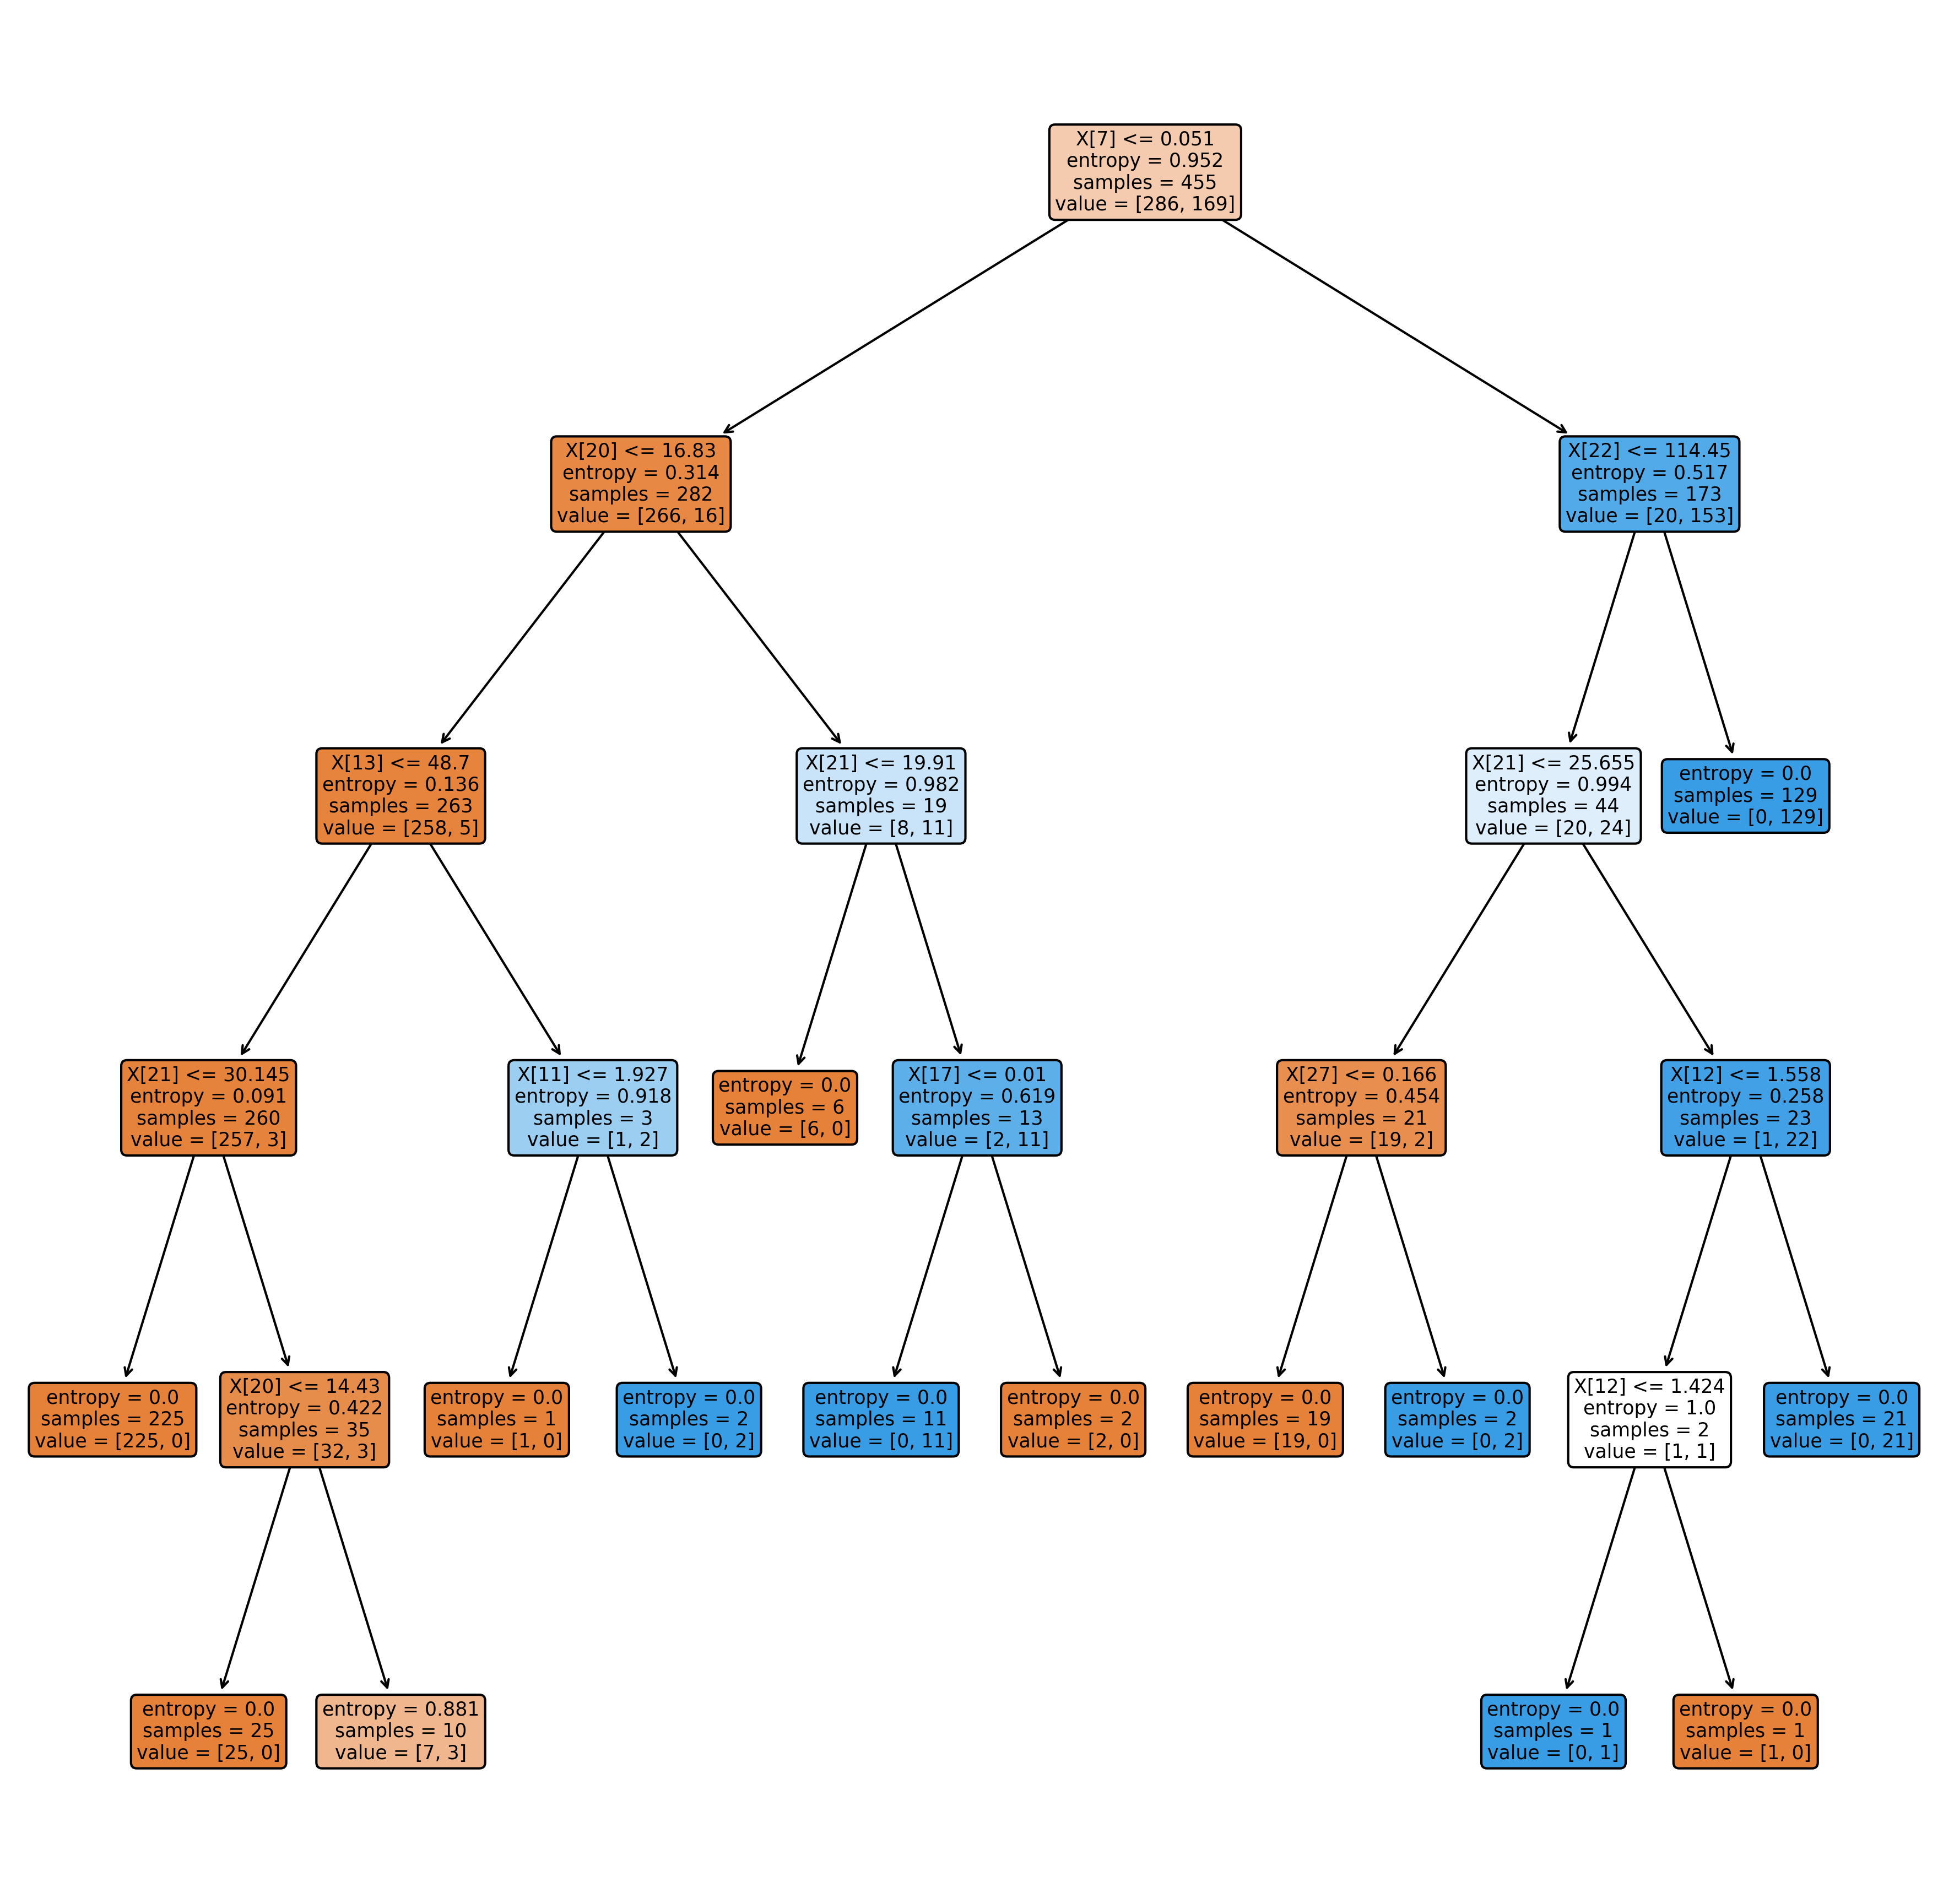

In [33]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(decision_tree,
               rounded = True,
               filled = True);

## 4. Random Forest model

### 4.1 Tuning the hyperparameters

We will start by tuning some of the hyperparameters in order to achieve maximum accuracy with our model. This will be done by searching over a range of values for five of the hyperparameters of the Random Forest Classifier:
- The number of estimators (n_estimators) - the number of trees in the forest
- The maximum number of features (max_features) - the number of features to consider when looking for the best split
- The maximum depth of the tree (max_depth)
- The minimum number of samples required to split an internal node (min_sample_split)
- The minimum number of samples required to be at a leaf node (min_samples_leaf)

In [15]:
random_forest_n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 11)]
random_forest_max_features = ['auto', 'sqrt']
random_forest_max_depth = [int(x) for x in np.linspace(5, 55, num = 5)]
random_forest_min_samples_split = [2, 5, 10]
random_forest_min_samples_leaf = [30, 40, 50]
random_forest_bootstrap = [True]

random_forest_random_params = {'n_estimators': random_forest_n_estimators,
               'max_features': random_forest_max_features,
               'max_depth': random_forest_max_depth,
               'min_samples_split': random_forest_min_samples_split,
               'min_samples_leaf': random_forest_min_samples_leaf,
               'bootstrap': random_forest_bootstrap,
               }

random_forest_search_input = RandomForestClassifier(random_state = constants.SEED)

random_forest_random_search = RandomizedSearchCV(estimator = random_forest_search_input, 
                               param_distributions = random_forest_random_params, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=constants.SEED, 
                               n_jobs = -1,)

random_forest_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   23.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Now we can see what the best choice of hyperparameters for our data is.

In [16]:
random_forest_params = random_forest_random_search.best_params_
random_forest_params

{'n_estimators': 60,
 'min_samples_split': 5,
 'min_samples_leaf': 30,
 'max_features': 'sqrt',
 'max_depth': 17,
 'bootstrap': True}

Now, we can use these for our model.

### 4.2 Running the model

In [17]:
random_forest = RandomForestClassifier(random_state = constants.SEED,
                               n_estimators = random_forest_params['n_estimators'],
                               min_samples_split = random_forest_params['min_samples_split'],
                               min_samples_leaf = random_forest_params['min_samples_leaf'],
                               max_features = random_forest_params['max_features'],
                               max_depth = random_forest_params['max_depth'])

random_forest.fit(X_train, y_train)

proba_random_forest = random_forest.predict_proba(X_test)
pred_random_forest = np.where(proba_random_forest[:,1] > constants.THRESHOLD, 1, 0)

### 4.2 Evaluating the model

First, lets look at the accuracy, precision and AUC of the model.

In [18]:
random_forest_acc, random_forest_precision, random_forest_auc = utilities.print_metrics(X_test, y_test, pred_random_forest, proba_random_forest, "Random forest")

Random forest accuracy: 97.40%
Random forest precision: 100.00%
Random forest AUC: 0.9971


The AUC is another measure of how good the model is. The closer it is to one the better the model.

We can also plot the confusion matrix, which gives us a visual representation of how the model labelled the test data.

Confusion matrix, without normalization
[[68  3]
 [ 0 43]]
Normalized confusion matrix
[[0.95774648 0.04225352]
 [0.         1.        ]]


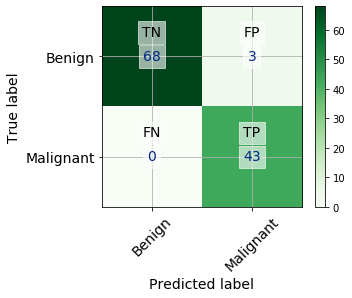

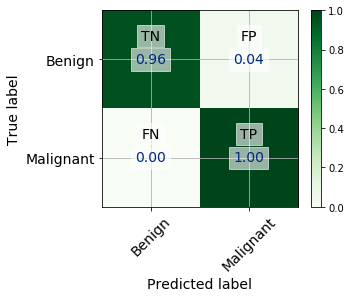

<Figure size 432x288 with 0 Axes>

In [19]:
random_forest_conf = confusion_matrix(y_test,pred_random_forest)
utilities.plot_conf_matrix(random_forest_conf, normalize=False,cmap='Greens')
utilities.plot_conf_matrix(random_forest_conf, normalize=True,cmap='Greens')
plt.show()
plt.tight_layout()

And finally, we can look at feature importance. This graph will show us which features were most important for the model in determining whether a mass was benign or malignant. 

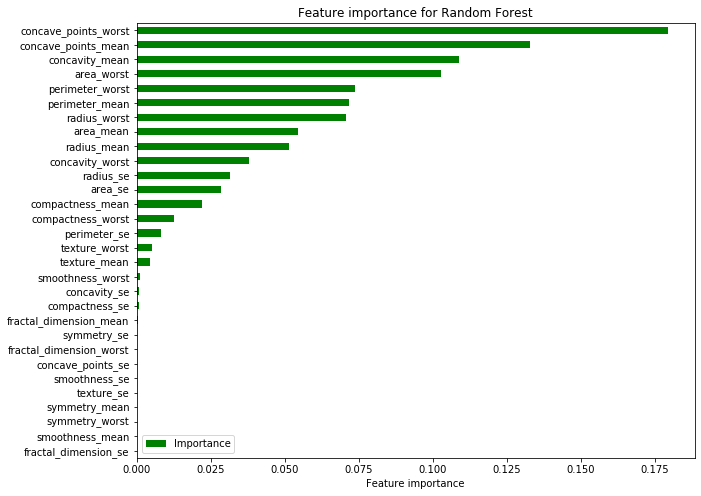

In [20]:
utilities.plot_feature_importance(random_forest,"green","Random Forest", one_hot_df_indep)
plt.show()

## 5. Multi-layer Perceptron

### 5.1 Tuning the hyperparameters

Here, we will search over four hyperparameters:

- The number and size of the hidden layers (hidden_layer_sizes)
- The maximum number of iterations (max_iter)
- The solver for weight optimisation (solver)
- The activation function for the hidden layer (activation)
- L2 penalty parameter (alpha)


In [40]:
multi_layer_perceptron_hidden_layer_sizes = np.arange(20,40,2)
multi_layer_perceptron_max_iter = np.arange(200,800,100)
multi_layer_perceptron_solver = ['lbfgs','adam']
multi_layer_perceptron_activation = ['logistic','relu']
multi_layer_perceptron_alpha = 10.0 ** -np.arange(1, 7)

multi_layer_perceptron_grid = {'hidden_layer_sizes': multi_layer_perceptron_hidden_layer_sizes,
                               'max_iter': multi_layer_perceptron_max_iter,
                               'solver': multi_layer_perceptron_solver,
                               'activation': multi_layer_perceptron_activation,
                               'alpha': multi_layer_perceptron_alpha}

multi_layer_perceptron_search_input = MLPClassifier(random_state=constants.SEED)

multi_layer_perceptron_grid_search = GridSearchCV(estimator = multi_layer_perceptron_search_input, 
                                                  param_grid = multi_layer_perceptron_grid,
                                                  cv = 3, 
                                                  verbose=2,
                                                  n_jobs = -1,
                                                  scoring = 'precision')

multi_layer_perceptron_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2600 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3289 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4058 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'hidden_layer_sizes': array([20, 22, 24, 26, 28, 30, 32, 34, 36

And the optimum hyperparameters are:

In [41]:
multi_layer_perceptron_params = multi_layer_perceptron_grid_search.best_params_
multi_layer_perceptron_params

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': 24,
 'max_iter': 400,
 'solver': 'adam'}

### 5.2 Evaluating the model

Let's look at the accuracy, precision and AUC.

In [42]:
proba_multi_layer_perceptron = multi_layer_perceptron_grid_search.predict_proba(X_test)
pred_multi_layer_perceptron = np.where(proba_multi_layer_perceptron[:,1] > constants.THRESHOLD, 1, 0)

multi_layer_perceptron_acc, multi_layer_perceptron_precision, multi_layer_perceptron_auc = utilities.print_metrics(X_test, 
                                                 y_test, 
                                                 pred_multi_layer_perceptron, 
                                                 proba_multi_layer_perceptron, 
                                                 "Multi-layer perceptron")

Multi-layer perceptron accuracy: 95.60%
Multi-layer perceptron precision: 98.00%
Multi-layer perceptron AUC: 0.9961


The confusion matrix:

Confusion matrix, without normalization
[[67  4]
 [ 1 42]]
Normalized confusion matrix
[[0.94366197 0.05633803]
 [0.02325581 0.97674419]]


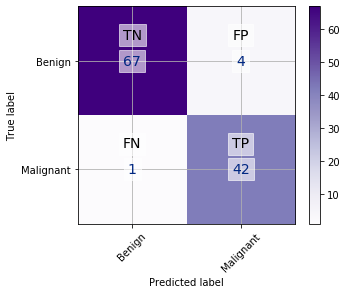

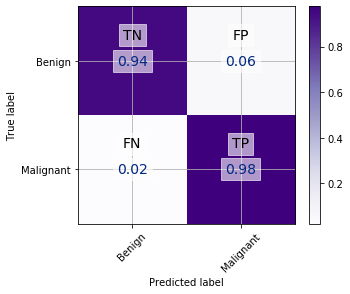

<Figure size 432x288 with 0 Axes>

In [43]:
multi_layer_perceptron_conf = confusion_matrix(y_test,pred_multi_layer_perceptron)
utilities.plot_conf_matrix(multi_layer_perceptron_conf, normalize=False,cmap='Purples')
utilities.plot_conf_matrix(multi_layer_perceptron_conf, normalize=True,cmap='Purples')
plt.show()
plt.tight_layout()

It's not possible to plot feature importance for the Multi-layer Perceptron classifier, so instead 

## 6. Conclusion

### 6.1 Comparing the models side-by-side

In order to pick the best model for the data, it is useful to compare the metrics.

First, lets compare the confusion matrices.

Confusion matrix, without normalization
[[70  1]
 [ 2 41]]


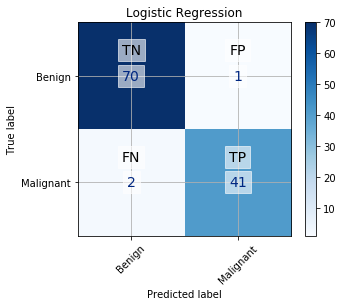

Confusion matrix, without normalization
[[70  1]
 [ 5 38]]


<Figure size 432x288 with 0 Axes>

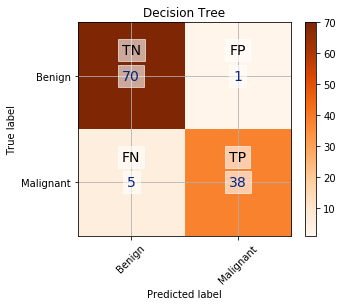

Confusion matrix, without normalization
[[68  3]
 [ 0 43]]


<Figure size 432x288 with 0 Axes>

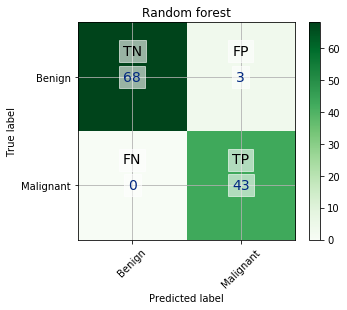

Confusion matrix, without normalization
[[67  4]
 [ 1 42]]


<Figure size 432x288 with 0 Axes>

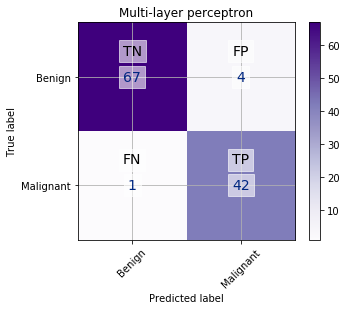

<Figure size 432x288 with 0 Axes>

In [44]:
# Logsitic regression model confusion matrix
utilities.plot_conf_matrix(logistic_regression_tuned_conf, normalize=False,cmap='Blues')
plt.title("Logistic Regression")
plt.show()
plt.tight_layout()

# Decision tree model confusion matrix
utilities.plot_conf_matrix(decision_tree_conf, normalize=False,cmap='Oranges')
plt.title("Decision Tree")
plt.show()
plt.tight_layout()

# Random forest model confusion matrix
utilities.plot_conf_matrix(random_forest_conf, normalize=False,cmap='Greens')
plt.title("Random forest")
plt.show()
plt.tight_layout()

# Multi-layer perceptron model confusion matrix
utilities.plot_conf_matrix(multi_layer_perceptron_conf, normalize=False,cmap='Purples')
plt.title("Multi-layer perceptron")
plt.show()
plt.tight_layout()



Here we can see that the Random Forest model doesn't give any false negatives, which is the most important factor to get right.

We can also compare the accuracy and precision:

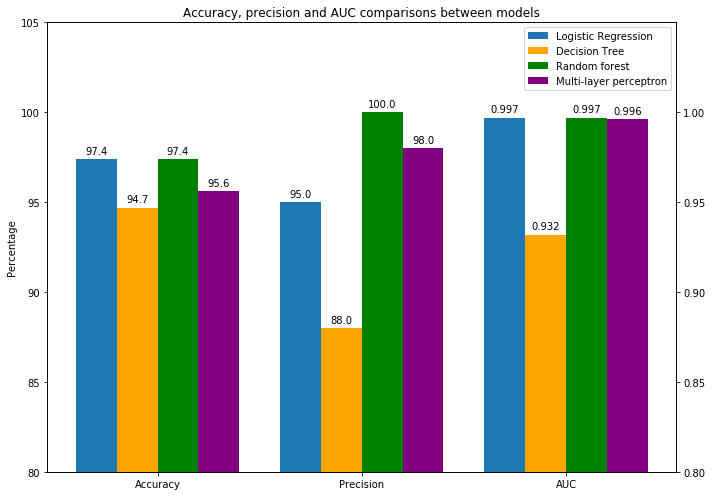

In [73]:
labels = ['Accuracy', 'Precision', 'AUC']
logistic_regression_metrics = np.around([logistic_regression_tuned_acc, 
                                         logistic_regression_tuned_precision,
                                        logistic_regression_tuned_auc*100],decimals=1)
decision_tree_metrics = np.around([decision_tree_acc, 
                                   decision_tree_precision,
                                   decision_tree_auc*100],decimals=1)
random_forest_metrics = np.around([random_forest_acc, 
                                   random_forest_precision,
                                   random_forest_auc*100],decimals=1)
multi_layer_perceptron_metrics = np.around([multi_layer_perceptron_acc, 
                                            multi_layer_perceptron_precision,
                                            multi_layer_perceptron_auc*100],decimals=1)

x = np.arange((len(labels)))  # the label locations
y = np.arange(0.8,1.05,0.05)
width = 0.2  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10,7))
ax2 = ax1.twinx()
ax2.set_ylim(bottom=0.8, top=1.05)
ax2.set_yticks(y)

rects1 = ax1.bar(x - 3*width/2, logistic_regression_metrics, width, label='Logistic Regression')
rects2 = ax1.bar(x - width/2, decision_tree_metrics, width, label='Decision Tree', color='Orange')
rects3 = ax1.bar(x + width/2, random_forest_metrics, width, label='Random forest', color='Green')
rects4 = ax1.bar(x + 3*width/2, multi_layer_perceptron_metrics, width, label='Multi-layer perceptron', color='Purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylim(bottom=80, top=105)
ax1.set_ylabel('Percentage')
ax1.set_title('Accuracy, precision and AUC comparisons between models')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper right')
secaxy.set_ylim(bottom = 0.8, top = 1.05)


def autolabel(rect):
    i=0
    """Attach a text label above each bar in *rects*, displaying its height."""
    while i < 2:
        height = rect[i].get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect[i].get_x() + rect[i].get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        i+=1
            
    height = rect[i].get_height()
    ax1.annotate('{}'.format(height/100),
                    xy=(rect[i].get_x() + rect[i].get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()

plt.show()


Again, we can see that the Random Forest has the best recision and the Decision tree has the worst. Random forest also has the best accuracy along with 

Another way we can compare the model is with the ROC curve. The area under this curve gives the model's AUC.

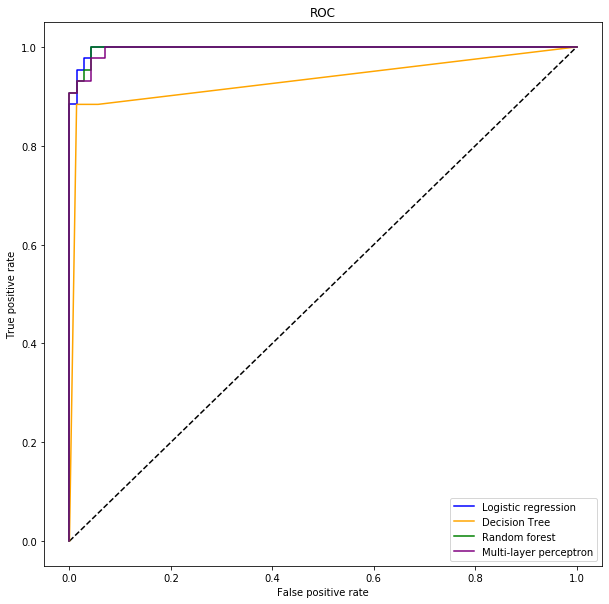

In [47]:
# Get the false positive rate and the true positive rate (probabilities NOT predictions)
fpr_logistic_regression, tpr_logistic_regression, _ = roc_curve(y_test, proba_logistic_regression_tuned[:,1])
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, proba_decision_tree[:,1])
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, proba_random_forest[:,1])
fpr_multi_layer_perceptron, tpr_multi_layer_perceptron, _ = roc_curve(y_test, proba_multi_layer_perceptron[:,1])

# Plot the ROC curve
fig = plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logistic_regression, tpr_logistic_regression, label='Logistic regression', color='Blue')
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree', color = 'Orange')
plt.plot(fpr_random_forest, tpr_random_forest, label='Random forest', color = 'Green')
plt.plot(fpr_multi_layer_perceptron, tpr_multi_layer_perceptron, label='Multi-layer perceptron', color='Purple')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='best')
plt.show()

This plot is not as easy to interpret but is a nice visualisation demonstrating where the AUC number comes from.

### 6.2 Recommendations for future work

It's clear from the comparisons that the Random Forest model made the best predictions, and therefore it is this model that we recommend for business use.

Data considerations:
- increasing the features of the dataset to include history of breast cancer and pre-existing health conditions could improve the accuracy of all of the models 
- decreasing the number of features needed for the input data could make data collection easier, and costs lower. The random forest feature importance chart in section 4.3 indicates which features are given most weight, and could be used to work out which features could be omitted from future models

We recommend that more data is collected for the model can be tested further to confirm its precision. Also to train it on a wider dataset before commercial use. 

Once we are confident with the predicitve power of the model, it can be deployed for commercial use. The development of a tool used in hostpitals should be focused around ease of use for doctors, as it will an aid in diagnosis, rather than be the sole reference. A confidence measure should be included for the doctor to refer to, which can be drawn from the probabilities produced by the model.

The model might also highlight features which have a correlation with malignancy, that doctors may not have previously been aware of. There are many examples where Artificial Intelligence and machine learning algorithms have uncovered new patterns or methods previously unknown to humans (for example in chess). It would be useful to have a feedback feature, like the feature importance graph, which notifies doctors or users of what was most important in making a diagnosis, in the hope that people can learn from the model. 